In [40]:
import pandas as np
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, QuantileTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [41]:
titanic = sns.load_dataset('titanic')
df = titanic[['pclass', 'sex', 'age', 'fare', 'embarked', 'survived']].copy()

In [42]:
x = df.drop('survived', axis=1)
y = df['survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [43]:
numeric_features = ['age', 'fare', 'pclass']
categorical_features = ['sex', 'embarked']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [44]:
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_features),
        ('categorical', categorical_transformer, categorical_features),
    ]
)

In [45]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=500))
])

In [46]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [47]:
acc = accuracy_score(y_test, y_pred)
print(acc)

0.7988826815642458


In [48]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[88 17]
 [19 55]]


In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



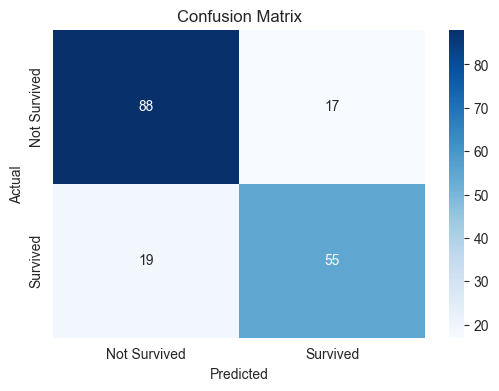

In [50]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [51]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,r2_score
import pandas as pd
import seaborn as sns

In [52]:
df = sns.load_dataset('iris')

x = df.drop(columns=['petal_length','species'])
y = df['petal_length']

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [54]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [55]:
import torch

x = torch.rand(100,1)
y = 3*x + 2+ 0.1*torch.randn(100,1)

w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

Y_pred = w*x + b

loss = torch.mean((y - Y_pred)**2)
loss.backward()
print("Loss:", loss.item())
print("Gradient w:", w.grad.item(), "Gradient b:", b.grad.item())

Loss: 29.93035316467285
Gradient w: -6.511873245239258 Gradient b: -10.79909896850586


In [56]:
import tensorflow as tf

X = tf.random.uniform((100, 1))
y = 3*X + 2 + 0.1*tf.random.normal((100, 1))
w = tf.Variable(tf.random.normal((1,)))
b = tf.Variable(tf.random.normal((1,)))

with tf.GradientTape() as tape:
    y_pred = w*X + b
    loss = tf.reduce_mean((y - y_pred)**2)

grads = tape.gradient(loss, [w, b])
print(loss.numpy())
print(grads[0].numpy(),grads[1].numpy())

30.803116
[-6.280715] [-10.760899]


In [57]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

x = np.random.rand(100, 10)
y = np.random.randint(0, 2, size=(100,))

In [58]:
model = models.Sequential([
    layers.Dense(16,activation='relu',input_shape=(10,)),
    layers.Dense(1,activation='sigmoid'),
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x,y,epochs=5,batch_size=8)

Epoch 1/5


C:\Users\Roktim\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5800 - loss: 0.6858  
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5800 - loss: 0.6838 
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5800 - loss: 0.6823 
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5800 - loss: 0.6793 
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5800 - loss: 0.6786 


In [59]:
import torch
import torch.nn as nn
import torch.optim as optim

x = torch.rand(100,10)
y = torch.randint(0,2,(100,),dtype= torch.float32)

class SimpleNN(nn.modules.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(10,16)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(16,1)
        self.sigmoid = nn.Sigmoid()
    def forward(self):
        return self.sigmoid(self.f2(self.relu(self.fc1(x))))

model = SimpleNN()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [60]:
# for epoch in range(5):
#     optimizer.zero_grad()
#     outputs = model(x,y).squeeze()
#     optimizer.step()
#     print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}')

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, RobustScaler, MaxAbsScaler, QuantileTransformer
import category_encoders as ce
from sklearn.preprocessing import (MinMaxScaler, RobustScaler, MaxAbsScaler, QuantileTransformer,OneHotEncoder, OrdinalEncoder,LabelEncoder,StandardScaler)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [62]:
titanic = sns.load_dataset('titanic')
df = titanic[['class', 'sex', 'age', 'fare', 'embarked', 'survived']].copy()
df.dropna(inplace=True)
df.head()

class     sex   age     fare embarked  survived
0  Third    male  22.0   7.2500        S         0
1  First  female  38.0  71.2833        C         1
2  Third  female  26.0   7.9250        S         1
3  First  female  35.0  53.1000        S         1
4  Third    male  35.0   8.0500        S         0

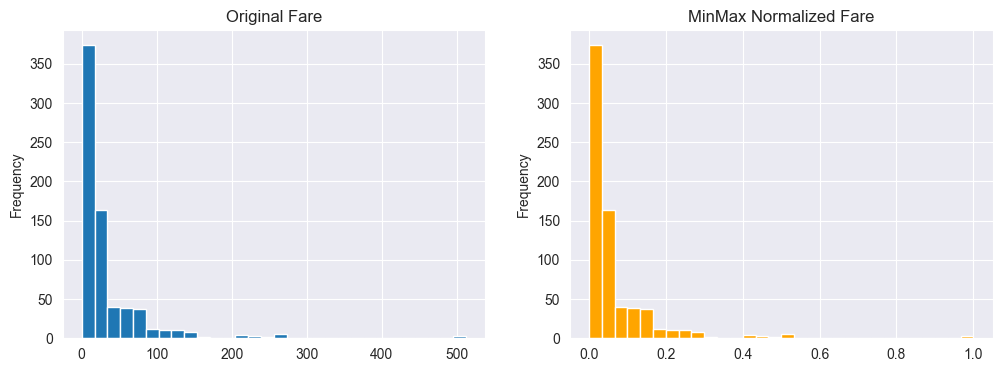

In [63]:
scaler = MinMaxScaler()
df_minmax = df.copy()
df_minmax[["age","fare"]] = scaler.fit_transform(df[["age","fare"]])
fig, axes = plt.subplots(1, 2, figsize=(12,4))
df["fare"].plot(kind="hist", bins=30, ax=axes[0], title="Original Fare")
df_minmax["fare"].plot(kind="hist", bins=30, ax=axes[1], title="MinMax Normalized Fare", color="orange")
plt.show()

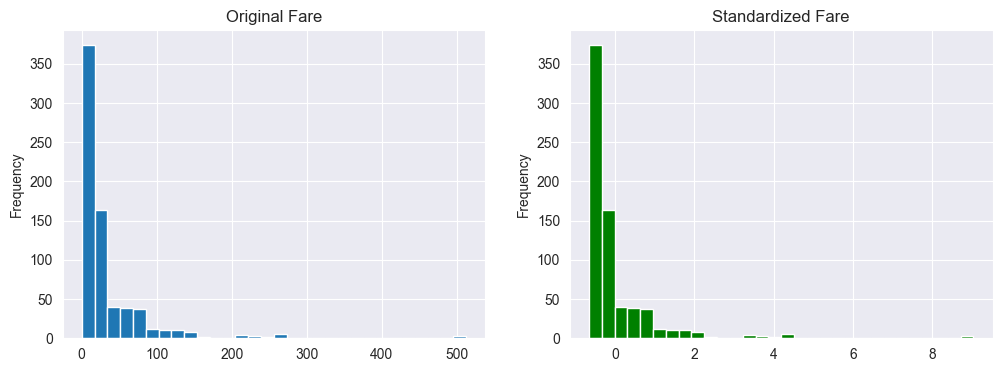

In [64]:
scaler = StandardScaler()
df_standard = df.copy()
df_standard[["age", "fare"]] = scaler.fit_transform(df[["age", "fare"]])

fig, axes = plt.subplots(1, 2, figsize=(12,4))
df["fare"].plot(kind="hist", bins=30, ax=axes[0], title="Original Fare")
df_standard["fare"].plot(kind="hist", bins=30, ax=axes[1], title="Standardized Fare", color="green")
plt.show()

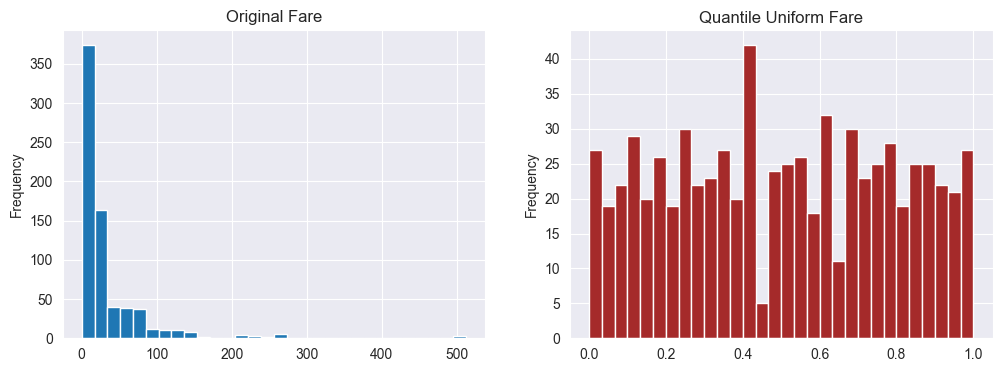

In [65]:
scaleer = QuantileTransformer(output_distribution='uniform',n_quantiles=100)
df_quantile_uniform = df.copy()
df_quantile_uniform[['age', 'fare']] = scaleer.fit_transform(df[["age", "fare"]])

fig, axes = plt.subplots(1, 2, figsize=(12,4))
df["fare"].plot(kind="hist", bins=30, ax=axes[0], title="Original Fare")
df_quantile_uniform["fare"].plot(kind="hist", bins=30, ax=axes[1], title="Quantile Uniform Fare", color="brown")
plt.show()

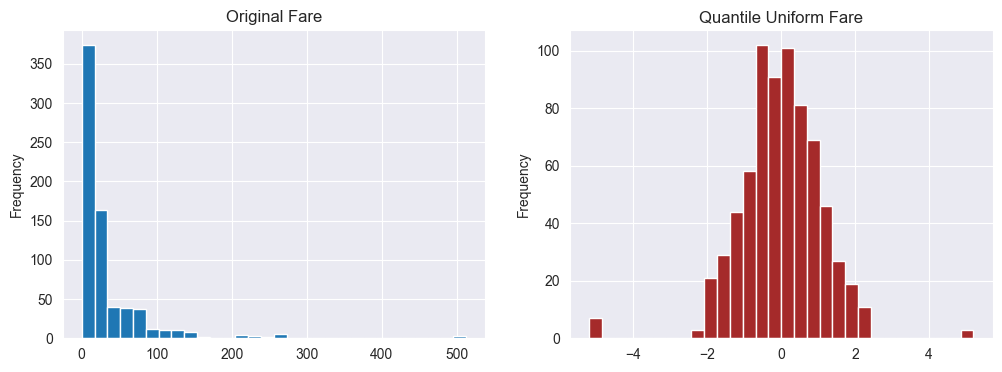

In [66]:
scaleer = QuantileTransformer(output_distribution='normal',n_quantiles=100)
df_quantile_uniform = df.copy()
df_quantile_uniform[['age', 'fare']] = scaleer.fit_transform(df[["age", "fare"]])

fig, axes = plt.subplots(1, 2, figsize=(12,4))
df["fare"].plot(kind="hist", bins=30, ax=axes[0], title="Original Fare")
df_quantile_uniform["fare"].plot(kind="hist", bins=30, ax=axes[1], title="Quantile Uniform Fare", color="brown")
plt.show()

In [67]:
categorical_features = ["sex", "embarked","class"]
le = LabelEncoder()
df_label = df.copy()
for col in categorical_features:
    df_label[col] = le.fit_transform(df_label[col])
    print(df_label)

      class  sex   age     fare embarked  survived
0     Third    1  22.0   7.2500        S         0
1     First    0  38.0  71.2833        C         1
2     Third    0  26.0   7.9250        S         1
3     First    0  35.0  53.1000        S         1
4     Third    1  35.0   8.0500        S         0
..      ...  ...   ...      ...      ...       ...
885   Third    0  39.0  29.1250        Q         0
886  Second    1  27.0  13.0000        S         0
887   First    0  19.0  30.0000        S         1
889   First    1  26.0  30.0000        C         1
890   Third    1  32.0   7.7500        Q         0

[712 rows x 6 columns]
      class  sex   age     fare  embarked  survived
0     Third    1  22.0   7.2500         2         0
1     First    0  38.0  71.2833         0         1
2     Third    0  26.0   7.9250         2         1
3     First    0  35.0  53.1000         2         1
4     Third    1  35.0   8.0500         2         0
..      ...  ...   ...      ...       ...       ...


In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [69]:
titanic = sns.load_dataset('titanic')
titanic.shape

(891, 15)

In [70]:
df = titanic[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']].dropna()
df.shape

(712, 8)

In [71]:
df['family_size'] = df['sibsp'] + df['parch'] + 1

In [72]:
df['age_fare_interaction'] = df['age'] * df['fare']

In [73]:
df['is_child'] = (df['age'] < 12).astype(int)

In [74]:
df = pd.get_dummies(df, columns=['sex', 'embarked'], drop_first=True)

In [75]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

In [76]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [79]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

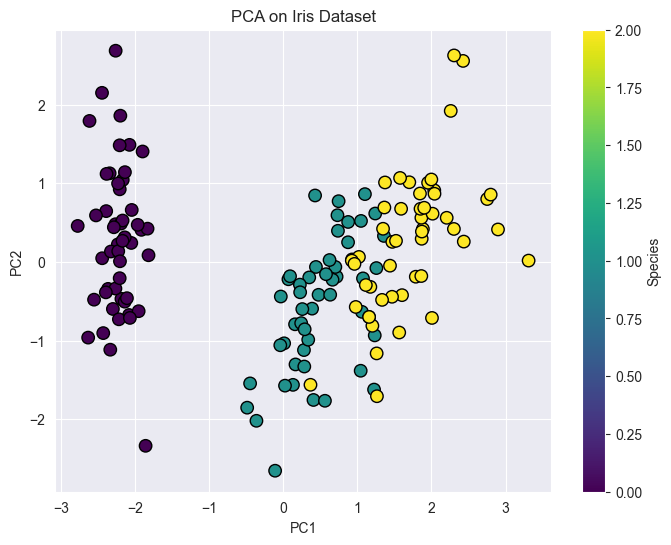

In [80]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='viridis', edgecolor='k', s=80)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA on Iris Dataset")
plt.colorbar(label="Species")
plt.show()

In [84]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df  =sns.load_dataset('titanic').copy()
num_cols = ["age", "fare", "pclass", "sibsp", "parch"]
df  =df.dropna(subset=["survived"]).copy()
y = df["survived"].astype(int)

In [85]:
for c in num_cols:
    df[c] = df[c].fillna(df[c].median())

X = df[num_cols].astype(float)

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [86]:
pca = PCA(n_components=2, svd_solver="full")
X_pca = pca.fit_transform(X_std)
evr = pca.explained_variance_ratio_
print("Explained variance ratio (PC1, PC2):", evr, " | cumulative:", evr.sum())

Explained variance ratio (PC1, PC2): [0.33960812 0.32520788]  | cumulative: 0.6648159969553279
